In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


In [83]:
df = pd.read_csv('../dataset/diabetes_binary_health_indicators_BRFSS2015.csv')

In [84]:
df_positive = df[ df['Diabetes_binary'] == 1 ] 
df_negative = df[ df['Diabetes_binary'] == 0 ]
df_negative_cut = df_negative.sample(n = 40000)
dataset = pd.concat([df_positive, df_negative_cut])

In [85]:
X = dataset.drop('Diabetes_binary', axis=1)
y = dataset['Diabetes_binary']

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [87]:
model = Sequential()

model.add(Dense(21, input_shape=(21,), activation='relu'))
model.add(Dense(11, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
result = model.fit(X_train, y_train, epochs = 20, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/20
6028/6028 [==============================] - 5s 847us/step - loss: 0.5454 - accuracy: 0.7203 - val_loss: 0.5259 - val_accuracy: 0.7356
Epoch 2/20
6028/6028 [==============================] - 5s 803us/step - loss: 0.5232 - accuracy: 0.7354 - val_loss: 0.5196 - val_accuracy: 0.7402
Epoch 3/20
6028/6028 [==============================] - 5s 798us/step - loss: 0.5187 - accuracy: 0.7400 - val_loss: 0.5151 - val_accuracy: 0.7390
Epoch 4/20
6028/6028 [==============================] - 5s 834us/step - loss: 0.5160 - accuracy: 0.7415 - val_loss: 0.5141 - val_accuracy: 0.7425
Epoch 5/20
6028/6028 [==============================] - 5s 814us/step - loss: 0.5143 - accuracy: 0.7431 - val_loss: 0.5164 - val_accuracy: 0.7425
Epoch 6/20
6028/6028 [==============================] - 5s 823us/step - loss: 0.5127 - accuracy: 0.7433 - val_loss: 0.5213 - val_accuracy: 0.7349
Epoch 7/20
6028/6028 [==============================] - 5s 848us/step - loss: 0.5118 - accuracy: 0.7436 - val_loss: 0.5147 -

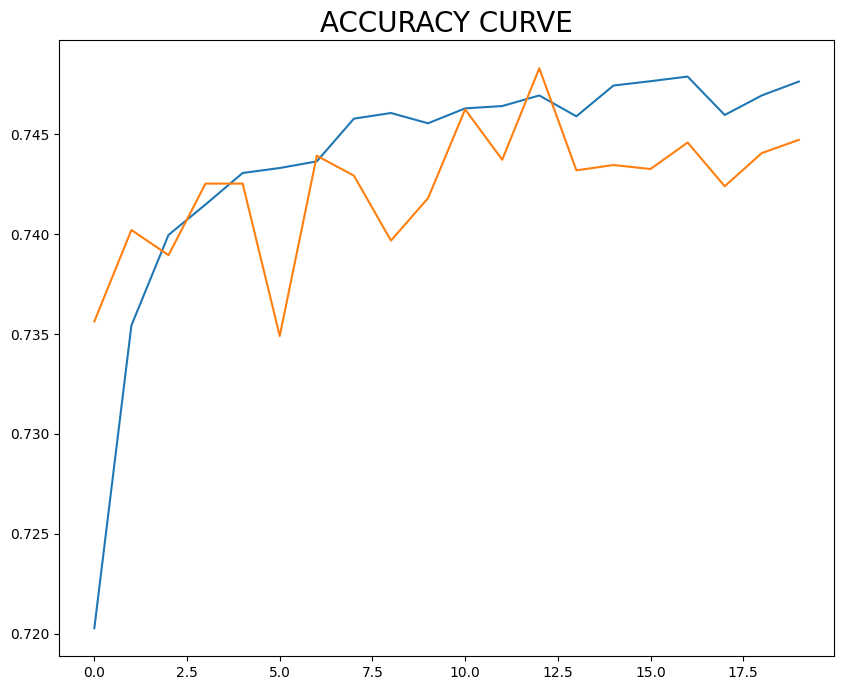

In [89]:
plt.figure(figsize=(10,8))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

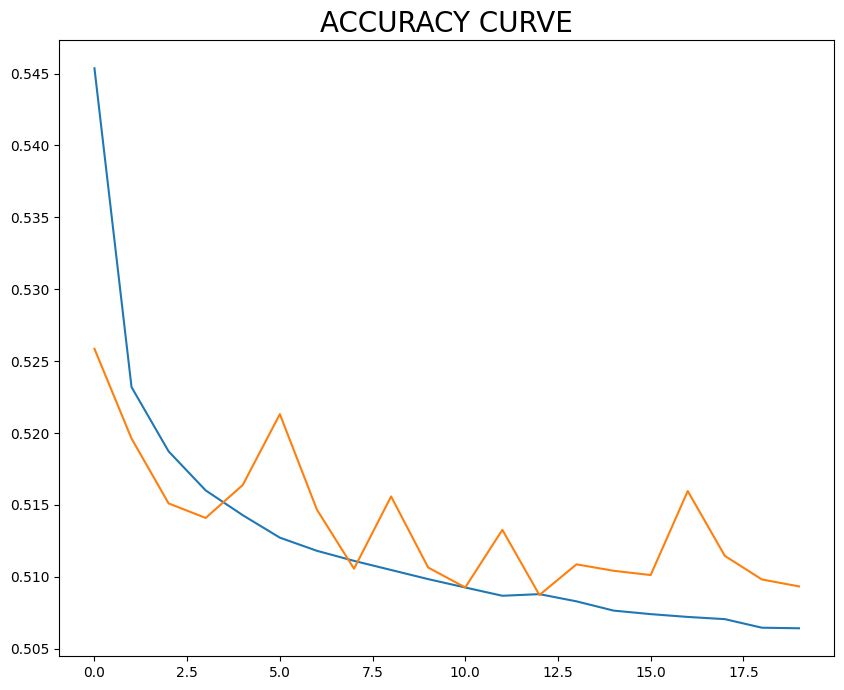

In [90]:
plt.figure(figsize=(10,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

In [91]:
model.evaluate(X_test, y_test)

471/471 [==============================] - 0s 585us/step - loss: 0.5093 - accuracy: 0.7447


[0.509330153465271, 0.7447246313095093]

model.save('./model',overwrite=True)